# Likelihood function

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
#plt.rcParams['font.size'] = '10'

## Data model - DC Level in Gaussian noise
Consider $x[n] = A + w[n]$ for $n=0,1,\dots,N-1$ where $w[n]\sim\mathcal{N}(0,\sigma^2)$. <br>
The PDF of $\mathbf{x}$ is given by
$$p(\mathbf{x},A) = \frac{1}{(2\pi\sigma^2)^{N/2}} \exp\left[ -\frac{1}{2\sigma^2}\sum_{n=0}^{N-1}(x[n]-A)^2 \right].$$

In [185]:
# DC level in Gaussiann model
A = 10
N = 2
M = 5

# Noise
sigma = 2
w = sigma*np.random.randn(N,M)

# Data
x = A + w

Text(0, 0.5, '$p(\\mathbf{x},A)$')

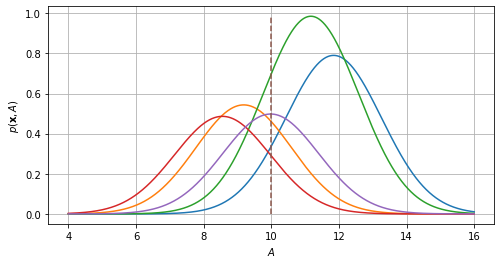

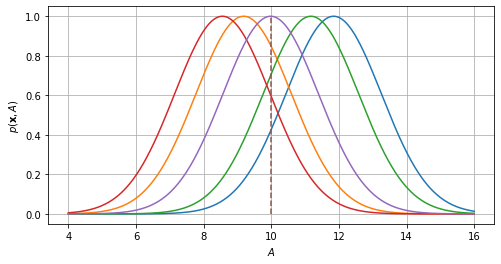

In [186]:
# Likelihood function
a = np.linspace(A-6,A+6,10000)

# Plotting 1
plt.figure(figsize=[8,4])
mp = 0
for m in range(M):
    p = 1
    for n in range(N):
        p = p * np.exp(-(x[n,m]-a)**2/(2*sigma**2))#/np.sqrt(2*np.pi*sigma**2)
    mp = np.maximum(mp,np.amax(p))
    plt.plot(a,p)
plt.plot([A,A],[0,mp],'--')
plt.grid('on')
plt.xlabel('$A$')
plt.ylabel('$p(\mathbf{x},A)$')

# Plotting 2
plt.figure(figsize=[8,4])
for m in range(M):
    p = 1
    for n in range(N):
        p = p * np.exp(-(x[n,m]-a)**2/(2*sigma**2))#/np.sqrt(2*np.pi*sigma**2)
    plt.plot(a,p/np.amax(p))
plt.plot([A,A],[0,1],'--')
plt.grid('on')
plt.xlabel('$A$')
plt.ylabel('$p(\mathbf{x},A)$')

Text(0, 0.5, '$\\ln p(\\mathbf{x},A)$')

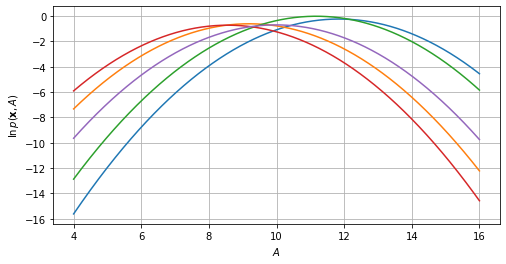

In [187]:
# Log-Likelihood function
a = np.linspace(A-6,A+6,1000)

# Plotting
plt.figure(figsize=[8,4])
for m in range(M):
    lp = 0
    for n in range(N):
        lp = lp -(x[n,m]-a)**2/(2*sigma**2)#-np.log(np.sqrt(2*np.pi*sigma**2))
    plt.plot(a,lp)

plt.grid('on')
plt.xlabel('$A$')
plt.ylabel('$\ln p(\mathbf{x},A)$')